Project On E -Commerce Customer Segmentation

The dataset contains details regarding the Invoice number,Stock code,description,Qunatity,Invoice date,Unit Price,CustomerID & Country

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

# Load and read the dataset

In [ ]:
df=pd.read_csv("data (1).csv",encoding="ISO-8859-1")
df.shape

In [ ]:
 # displays first five rows
df.head()        

In [ ]:
#data type
df.dtypes                                                                    

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

In [ ]:
# check for null values
df.isnull().sum()                                                    

With the enormous data available, it is impossible to impute values for the customerID. So deleting the missing values in customerID from the dataframe.

In [ ]:
#dropping the missing values/rows from the CustomerID

df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)                              
df.shape

In [ ]:
df.isnull().sum()

#Checking for duplicate entries and deleting them .

In [ ]:
df['Country'].duplicated().value_counts()

In [ ]:
df['InvoiceNo'].duplicated().value_counts()

In [ ]:
df.duplicated().sum()


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

# Doing NLP in the description colum
-removing spaces & number
-converting to small letters

In [ ]:
df["Description"]

In [ ]:
df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")
#df["Desc_new"]=df["Desc_new"].astype(str)
df["Desc_new"]

In [ ]:
df["Desc_new"]=df["Desc_new"].apply(lambda row:" ".join([word for word in row.split() if len(word)>2]))
df["Desc_new"]

In [ ]:
df["Desc_new"]=[review.lower() for review in df["Desc_new"]]
df["Desc_new"]
                

#Removing Stop words ,lemmatising

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stopwrds =stopwords.words('english')

#Making cutom list of stop words to be removed
addwrds=[]

#Adding to thelist of words
stopwrds.extend(addwrds)

#Function to remove stop words
def remove_stopwrds(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stopwrds])
  return rev_new


#Removing Stop words
df['Desc_new']=[remove_stopwrds(r) for r in df['Desc_new']]




In [ ]:
#Begin Lemmatisation
nltk.download("wordnet")
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startwith('J'):
    return wordnet.ADJ
  elif nltk_tag.startwith('V'):
    return wordnet.VERB
  elif nltk_tag.startwith('N'):
    return wordnet.NOUN
  elif nltk_tag.startwith('R'):
    return wordnet.ADJ
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_-word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)

  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
     lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


  df["Desc_new"]=df['Desc_new'].apply(lambda x:lemmatize_sentence(x))



In [ ]:
df

In [ ]:
#Removing duplicated descriptions
df2=df["Desc_new"].drop_duplicates()
df2=pd.DataFrame(df2)
df2

In [ ]:
#Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer # give you the bag of words model
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False) 

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df2["Desc_new"]) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names_out()

df3=pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

In [ ]:
#shows the words in description colum
df3

In [ ]:
x=bag_of_words.toarray()
x

#Using K-means clustering

In [ ]:

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("fivethirtyeight") 
from warnings import filterwarnings 
filterwarnings("ignore")

To find the optimal value of K we are use Elbow plot ,where k is the hyperparameter.


In [ ]:
list_k=list(range(1,25)) 
inertias = [] 
for k in list_k:
    km = KMeans(n_clusters=k) 
    km.fit(x) 
    inertias.append(km.inertia_)

In [ ]:
# Make elbow plot 
plt.figure(figsize = (5, 5)) 
plt.title('Elbow plot') 
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*') 
plt.ylabel('Sum of squared error')

Here we used Kmeans to find the optimal vlaue of K Since there is no optimal value that can be infered here with the elbow plot we will do PCA.(Principal Component Analysis)

In [ ]:
sc=StandardScaler() #performing standarisation  
X_scaled= sc.fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
components= None
pca=PCA(n_components = components) #components is the number of reduced relevant columns (hyperparameter) 
pca.fit(x)                                                                        

In [ ]:
#prints the  variance
print("Variances(Percentage)")
print(pca.explained_variance_ratio_*100)


In [ ]:
print("cumulative variance (Percentage)") 
print((pca.explained_variance_ratio_.cumsum() * 100)[:100])

In [ ]:
#plot the cumulative varience
components=len(pca.explained_variance_ratio_)\
if components  is None else components
plt.plot(range(1,components+1),np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")
         

In [ ]:
#From the above graph we can see that it takes 1500 components to reach flat curve(100% varience).
# choosing around  90% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
pca.fit(x)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Applying PCA:
PCA  helps in  lower dimension of data,while keeping all original variables in the model.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(638)
Principal_Component_Analysis=pca.fit_transform(x)
Principal_Component_Analysis.shape

In [ ]:
#Elbow plot
#We make a plot btwn K value and inertia

list_k=list(range(1,20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

In [ ]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [ ]:
#km modelling
km=KMeans(n_clusters=12)#applying k
km.fit(Principal_Component_Analysis )#fit the data

centroids = km.cluster_centers_

In [ ]:
#shows which group each datapoint belongs to
km.labels_

In [ ]:
#Predicts the labels of cluster
label=km.fit_predict(Principal_Component_Analysis)
print(label)

In [ ]:
#Getting the centroids 
centroids=km.cluster_centers_
llabels=np.unique(label)

#plotting

plt.figure(figsize=(10,6))
for i in llabels:
    plt.scatter(Principal_Component_Analysis[label == i,0],Principal_Component_Analysis[label == i,1],label =i)
plt.scatter(centroids[:,0],centroids[:,1],s=100,c="k",label="centroids")
plt.legend()
plt.show()

#Concatenating the label,NLP description  into original dataframe

In [ ]:
df5=pd.DataFrame(km.labels_)
print(df5.shape)
df5

In [ ]:
df2=df2.reset_index(drop=True)
df2

In [ ]:
df6=df2.join(df5)
df6.rename(columns={0:'Product Code'},inplace=True)
df6.head(3)

In [ ]:
df8=pd.merge(df,df6,how="left",on="Desc_new")
df8

In [ ]:
df9 = pd.get_dummies(df8,columns=["Product Code"])##product code one hot encoding
df9.head()       

In [ ]:
df10 = df9.copy() #copying df9 

In [ ]:
df10 = df10.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Country","Desc_new"],axis=1)
df10.head()

Grouping the Customers based on CustomerID:

In [ ]:
df11 = df10.groupby(['CustomerID']).mean()
df11

In [ ]:
df11.describe()

In [ ]:
# Converting into numpy array:

y = df11.to_numpy()
y

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler 
sc = MinMaxScaler() 
y_scaled = sc.fit_transform(y)

In [ ]:
list_k=list(range(1,15)) 
inertias = [] 
for k in list_k: 
    km = KMeans(n_clusters=k) 
    km.fit(y_scaled) 
    inertias.append(km.inertia_)
    

In [ ]:
plt.figure(figsize = (5, 5)) 
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o') 
plt.xlabel('Clusters of *k*') 
plt.ylabel('Sum of squared error')

From Elbow plot we can say that the optimal  K value is at 4,thus the customers can be clusterd into 4 clusters based on their similarities

In [ ]:
km = KMeans(n_clusters=4) # applying k = 4
km.fit(y_scaled)# fit the data 

centroids = km.cluster_centers_ # final centroid points

print("centroids: ",centroids)
print("inertia: ",km.inertia_) 

In [ ]:
km.labels_ 

In [ ]:
label = km.fit_predict(y_scaled)  
print(label)

Visualizing the customer clusters:

In [ ]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

#  plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 0] , y_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] ,  c="k", s=150, label="centroids")
plt.legend()
plt.show()

Since the graph doesnt give a clear picture of the clusters formed ,we are converting the label to dataframe and assigne the respective labels to their clusters and plot them.

In [ ]:
df13 = pd.DataFrame(label)
df13.head()

In [ ]:
df13.reset_index(level=0, inplace=True)       

In [ ]:
df13.rename(columns={'index':'ID', 0:'Customer cluster'},inplace=True)
df13.head()

In [238]:
df14 = df13.groupby("Customer cluster").count()   
df14

,ID
Customer cluster,
0,879
1,2546
2,97
3,850


<Axes: xlabel='Customer cluster', ylabel='count'>

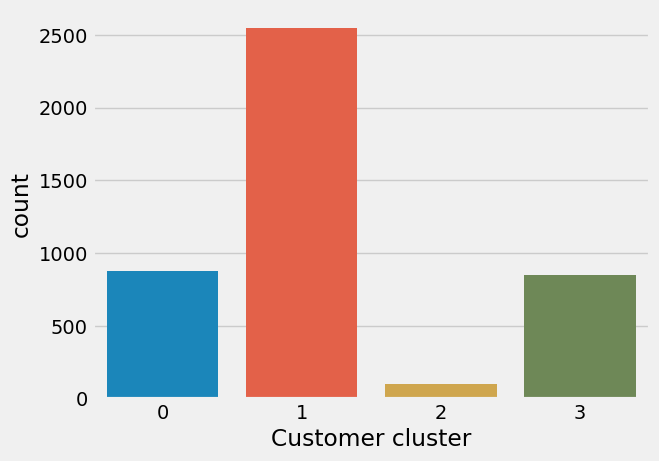

In [247]:

import seaborn as sns 
sns.countplot(x="Customer cluster",data=df13)


From the  above graph Customer Cluster 1 is having the maximum number of Cutomers and cluster 2 has the minimum number of customers